# Corona virus: Fact or Hype

<img src="figures/covid-19.jpg" width=500>

At the time of the writing of this notebook (updated March 18, 2020), the world has decended into mass panic, fueled by misinformation in the media.  In the stock market, the DOW-Jones Industrial Average dropped from 29,000 to 22,000 points, sending business and retirement accounts tumbling.

So, is this really a pandemic, or just hype?  According to the Centers for Disease Control and Prevention (CDC), this is no different than the [common flu](https://www.cdc.gov/coronavirus/2019-ncov/index.html).

If you are reading this notebook, you reaize that you are more than a lay-person.  You have powerful tools at your fingertips, and you likely have data to analyze and formulate your own opinion.  You realize that to be a Data Scientist requires you to be a creative and critical thinker, an individual.

Team DSBC had the same notion!

So we collected data from the CDC and [World Health Organization](https://www.who.int/csr/don/12-january-2020-novel-coronavirus-china/en/) (WHO) websites.  But we didn't stop there.  We are critical thinkers too.  We also colected data for:
- [Coronavirus international incidence dates](https://www.washington.edu/news/2020/02/07/interactive-map-shows-worldwide-spread-of-coronavirus/)
- [2009 H1N1 Swine Flu](https://academic.oup.com/cid/article/52/suppl_1/S75/499147#97947460), [here](https://www.cdc.gov/flu/spotlights/pandemic-global-estimates.htm), [here](http://www.cidrap.umn.edu/news-perspective/2011/08/study-puts-global-2009-h1n1-infection-rate-11-21), [here](https://www.cdc.gov/flu/pandemic-resources/2009-pandemic-timeline.html), [and here](https://en.wikipedia.org/wiki/2009_flu_pandemic_timeline#March_2009)
- [Ebola](https://www.cdc.gov/vhf/ebola/history/2014-2016-outbreak/case-counts.html)
- [SARS](https://www.who.int/csr/sars/country/en/)
- [MERS](https://hazards.colorado.edu/quick-response-report/dynamics-of-interorganizational-risk-management-networks-during-the-2015-mers-response-in-south-korea)
- [1918 Spanish Flu](https://www.cdc.gov/flu/pandemic-resources/1918-commemoration/pandemic-timeline-1918.htm) [and here](https://wwwnc.cdc.gov/eid/article/12/1/05-0979_article)


Just for completeness, we also collected data on:
- [Car crashes](https://www.asirt.org/safe-travel/road-safety-facts/)
- [Suicides](https://www.medicalnewstoday.com/articles/234219.php#1)
- [Cancer](https://www.who.int/news-room/fact-sheets/detail/cancer)
- [Ischemic Heart Disease](https://www.ahajournals.org/doi/10.1161/CIRCOUTCOMES.118.005375)
- [Generic US Flu](https://www.cdc.gov/flu/about/burden/preliminary-in-season-estimates.htm)
- [Stroke](http://www.strokecenter.org/patients/about-stroke/stroke-statistics/)
- [Drowning](https://www.who.int/news-room/fact-sheets/detail/drowning) 
- [Bed strangulation](https://www.businessinsider.com/weird-causes-of-death-2016-7#w75-accidental-suffocation-and-strangulation-in-bed--10206-deaths-7)
[also here](https://wonder.cdc.gov/controller/datarequest/D76)
- [SIDS](https://pediatrics.aappublications.org/content/pediatrics/122/3/660.full.pdf?download=true), [and here](http://www.idph.state.il.us/sids/sids_factsheet.htm)
- [Domestic Violence](https://www.npr.org/sections/goatsandsoda/2018/11/30/671872574/u-n-report-50-000-women-a-year-are-killed-by-intimate-partners-family-members)
- [Animal deaths](https://www.businessinsider.com/worlds-deadliest-animals-2016-9/)
- [Alzheimer's](https://braintest.com/alzheimers-statistics-throughout-the-united-states-and-worldwide/)
- [Malaria](https://www.childfund.org/infographic/malaria/)
- [Homicide](https://ourworldindata.org/homicides)

So why did we go through all of this trouble?  Well, like any problem, we like to have as much data as possible to make good scientific decisions, and compare results where possible.  In this case, it is nice to compare COVID-19 to MERS and others.  As you will likely find, as we did, if you are [older than 5 and younger than 60](https://www.cdc.gov/coronavirus/2019-ncov/index.html), you are more likely to die of a car accident, than you are of COVID-19.

Below is the data, and several plots with some analysis.  Use your judgement and make your own decision.

We will continue to update this notebook over the next several weeks, so stay tuned!


## Table of Contents:
* [1. Preprocessing](#Preprocessing)
* [2. Initial COVID-19 Analysis](#initial_covid_19_analysis)
* [3. Countries Affected by COVID-19, Ebola, SARS - Cases](#covid_19_ebola_sars_countries_cases)
* [4. Countries Affected by COVID-19, Ebola, SARS - Deaths](#covid_19_ebola_sars_countries_deaths)
* [5. Comparison: COVID-19, SARS, Ebola, MERS, H1N1](#comparison_covid_19_sars_ebola_mers_h1n1)
* [6. Comparison: Common Flu, Car Crashes, etc.](#comparison_everything_else)
* [7. Case Study: China rate of recovery?](#case_study_china)
* [8. Case Study: World rate of recovery?](#case_study_not_china)
* [9. Initial Analysis](#initial_analysis)
* [10. Conclusions](#conclusion)



# Set-up
As with all of our notebooks, we begin with the standard imports:

In [46]:
# storing and anaysis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from plotnine import *
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium

# color pallette
s = '#f0134d'
h = '#12cad6'
e = '#4a47a3'
m = '#42e6a4'
c = '#333333'
c = '#393e46'
d = '#ff2e63'
r = '#30e3ca'
i = '#f8b400'
cdr = [c, d, r] # grey - red - blue
idr = [i, d, r] # yellow - red - blue
shemc = [s, h, e, m, c]
sec = [s, e, c]
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# Preprocessing <a class="anchor" id="Preprocessing"></a>

In [47]:
# COVID-19
# --------

# importing datasets
covid_19 = pd.read_csv('data/novel-corona-virus-2019-dataset/covid_19_data.csv', 
                         parse_dates=['Date'])

# selecting important columns only
covid_19 = covid_19[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

# replacing Mainland china with just China
covid_19['Country/Region'] = covid_19['Country/Region'].replace('Mainland China', 'China')

# renaming columns
covid_19.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
covid_19 = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
covid_19 = covid_19.sum().reset_index()

# latest
c_lat = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()

# latest grouped by country
c_lat_grp = c_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
covid_19['nth_day'] = (covid_19['Date'] - min(covid_19['Date'])).dt.days

# day by day
c_dbd = covid_19.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
c_dbd['nth_day'] = covid_19.groupby('Date')['nth_day'].max().values

# no. of countries
temp = covid_19[covid_19['Cases']>0]
c_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

covid_19.head()

Date      Country  Cases  Deaths  Recovered  nth_day
0 2020-01-22        China  547.0    17.0       28.0        0
1 2020-01-22    Hong Kong    0.0     0.0        0.0        0
2 2020-01-22        Japan    2.0     0.0        0.0        0
3 2020-01-22        Macau    1.0     0.0        0.0        0
4 2020-01-22  South Korea    1.0     0.0        0.0        0

In [48]:
# EBOLA
# ------

# ebola dataset
ebola_14 = pd.read_csv("data/ebola-outbreak-20142016-complete-dataset/ebola_2014_2016_clean.csv", 
                       parse_dates=['Date'])

# selecting important columns only
ebola_14 = ebola_14[['Date', 'Country', 'No. of confirmed, probable and suspected cases',
                     'No. of confirmed, probable and suspected deaths']]

# renaming columns
ebola_14.columns = ['Date', 'Country', 'Cases', 'Deaths']
ebola_14.head()

# group by date and country
ebola_14 = ebola_14.groupby(['Date', 'Country'])['Cases', 'Deaths']
ebola_14 = ebola_14.sum().reset_index()

# filling missing values
ebola_14['Cases'] = ebola_14['Cases'].fillna(0)
ebola_14['Deaths'] = ebola_14['Deaths'].fillna(0)

# converting datatypes
ebola_14['Cases'] = ebola_14['Cases'].astype('int')
ebola_14['Deaths'] = ebola_14['Deaths'].astype('int')

# latest
e_lat = ebola_14[ebola_14['Date'] == max(ebola_14['Date'])].reset_index()

# latest grouped by country
e_lat_grp = e_lat.groupby('Country')['Cases', 'Deaths'].sum().reset_index()

# nth day
ebola_14['nth_day'] = (ebola_14['Date'] - min(ebola_14['Date'])).dt.days

# day by day
e_dbd = ebola_14.groupby('Date')['Cases', 'Deaths'].sum().reset_index()

# nth day
e_dbd['nth_day'] = ebola_14.groupby('Date')['nth_day'].max().values

# no. of countries
temp = ebola_14[ebola_14['Cases']>0]
e_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

ebola_14.head()

Date       Country  Cases  Deaths  nth_day
0 2014-08-29        Guinea    648     430        0
1 2014-08-29       Liberia   1378     694        0
2 2014-08-29       Nigeria     19       7        0
3 2014-08-29  Sierra Leone   1026     422        0
4 2014-09-05        Guinea    812     517        7

In [49]:
# SARS
# ----

# sars dataset
sars_03 = pd.read_csv("data/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv", 
                       parse_dates=['Date'])

# selecting important columns only
sars_03 = sars_03[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths', 'Number recovered']]

# renaming columns
sars_03.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
sars_03 = sars_03.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
sars_03 = sars_03.sum().reset_index()

# latest
s_lat = sars_03[sars_03['Date'] == max(sars_03['Date'])].reset_index()

# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
sars_03['nth_day'] = (sars_03['Date'] - min(sars_03['Date'])).dt.days

# day by day
s_dbd = sars_03.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
s_dbd['nth_day'] = sars_03.groupby('Date')['nth_day'].max().values

# no. of countries
temp = sars_03[sars_03['Cases']>0]
s_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

s_dbd.head()

Date  Cases  Deaths  Recovered  nth_day  n_countries
0 2003-03-17    167       4          0        0            7
1 2003-03-18    219       4          0        1            9
2 2003-03-19    264       9          0        2           11
3 2003-03-20    306      10          0        3           12
4 2003-03-21    350      10          0        4           14

In [50]:
e_dbd['new_cases'] = e_dbd['Cases'].diff()
c_dbd['new_cases'] = c_dbd['Cases'].diff()
s_dbd['new_cases'] = s_dbd['Cases'].diff()

e_dbd['new_deaths'] = e_dbd['Deaths'].diff()
c_dbd['new_deaths'] = c_dbd['Deaths'].diff()
s_dbd['new_deaths'] = s_dbd['Deaths'].diff()

e_dbd['epidemic'] = 'EBOLA'
c_dbd['epidemic'] = 'COVID-19'
s_dbd['epidemic'] = 'SARS'

## Initial COVID-19 Analysis <a class="anchor" id="initial_covid_19_analysis"></a>

In [51]:
# dataframe info
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 6 columns):
Date         2744 non-null datetime64[ns]
Country      2744 non-null object
Cases        2744 non-null float64
Deaths       2744 non-null float64
Recovered    2744 non-null float64
nth_day      2744 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 128.8+ KB


In [52]:
# still infected = confirmed - deaths - recovered
covid_19['Still Infected'] = covid_19['Cases'] - covid_19['Deaths'] -covid_19['Recovered']

# replacing Mainland china with just China
covid_19['Country'] = covid_19['Country'].replace('Mainland China', 'China')

# filling missing values with NA
#covid_19[['Province/State']] = covid_19[['Province/State']].fillna('NA')
#covid_19[['Confirmed', 'Deaths', 'Recovered', 'Still Infected']] = covid_19[['Confirmed', 'Deaths', 'Recovered', 'Still Infected']].fillna(0)

In [53]:
temp = covid_19.groupby('Date')['Cases', 'Deaths', 'Recovered', 'Still Infected'].sum()
temp = temp.reset_index()
temp = temp.sort_values('Date', ascending=False)
temp.head(1).reset_index(drop=True).style.background_gradient(cmap='Pastel1')

In [54]:
tm = temp.head(1).melt(id_vars="Date", value_vars=['Still Infected', 'Deaths', 'Recovered'])
fig = px.treemap(tm, path=["variable"], values="value", height=200, 
                 color_discrete_sequence = [r, i, d])
fig.show()

In [55]:
# cases in the Diamond Princess cruise ship
ship = covid_19[covid_19['Country']=='Diamond Princess cruise ship']

# full table
china = covid_19[covid_19['Country']=='China']
row = covid_19[covid_19['Country']!='China']

# latest
covid_19_latest = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()
china_latest = covid_19_latest[covid_19_latest['Country']=='China']
row_latest = covid_19_latest[covid_19_latest['Country']!='China']

# latest condensed
covid_19_latest_grouped = covid_19_latest.groupby('Country')['Cases', 'Deaths', 'Recovered', 'Still Infected'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Country')['Cases', 'Deaths', 'Recovered', 'Still Infected'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country')['Cases', 'Deaths', 'Recovered', 'Still Infected'].sum().reset_index()

### In each country

In [56]:
temp_f = covid_19_latest_grouped[['Country', 'Cases', 'Deaths', 'Recovered']]
temp_f = temp_f.sort_values(by='Cases', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Pastel1_r')

### Countries with deaths reported

In [57]:
temp_flg = covid_19_latest_grouped[['Country', 'Deaths']]
temp_flg = temp_flg.sort_values(by='Deaths', ascending=False)
temp_flg = temp_flg.reset_index(drop=True)
temp_flg = temp_flg[temp_flg['Deaths']>0]
temp_flg.style.background_gradient(cmap='Reds')

### Countries with all the cases recovered

In [58]:
temp = row_latest_grouped[row_latest_grouped['Cases']==
                          row_latest_grouped['Recovered']]
temp = temp[['Country', 'Cases', 'Recovered']]
temp = temp.sort_values('Cases', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

### Countries where all cases died

In [59]:
temp = row_latest_grouped[row_latest_grouped['Cases']==
                          row_latest_grouped['Deaths']]
temp = temp[['Country', 'Cases', 'Deaths']]
temp = temp.sort_values('Cases', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Reds')

### Spread over time

In [60]:
formated_gdf = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf = formated_gdf[formated_gdf['Country']!='China']
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Cases'].pow(0.5)

fig = px.scatter_geo(formated_gdf[formated_gdf['Country']!='China'], 
                     locations="Country", locationmode='country names', 
                     color="Cases", size='size', hover_name="Country", 
                     range_color= [0, max(formated_gdf['Cases'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread outside China over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

## Number of cases in each country

In [61]:
fig = px.bar(covid_19_latest_grouped[['Country', 'Cases']].sort_values('Cases', ascending=False), 
             x="Cases", y="Country", color='Country', orientation='h',
             log_x=True, color_discrete_sequence = px.colors.qualitative.Bold, title='Confirmed Cases', width=900, height=1200)
fig.show()

temp = covid_19_latest_grouped[['Country', 'Deaths']].sort_values('Deaths', ascending=False)
fig = px.bar(temp[temp['Deaths']>0], 
             x="Deaths", y="Country", color='Country', title='Deaths', orientation='h',
             log_x=True, color_discrete_sequence = px.colors.qualitative.Bold, width=900)
fig.show()

## Number of cases each day

In [62]:
temp = covid_19.groupby(['Country', 'Date'])['Cases', 'Deaths', 'Recovered'].sum()
temp = temp.reset_index()
# temp.head()

fig = px.bar(temp, x="Date", y="Cases", color='Country', orientation='v', height=600,
             title='Confirmed', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

fig = px.bar(temp, x="Date", y="Deaths", color='Country', orientation='v', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

## Composition of Cases

In [63]:
fig = px.treemap(row_latest, path=["Country"], values="Cases", 
                 title='Number of Confirmed Cases outside china',
                 color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

fig = px.treemap(row_latest, path=["Country"], values="Deaths", 
                 title='Number of Deaths outside china',
                 color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

fig = px.treemap(row_latest, path=["Country"], values="Recovered", 
                 title='Number of Recovered Cases outside china',
                 color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

# Countries affected by COVID-19, Ebola, SARS - Cases <a class="anchor" id="covid_19_ebola_sars_countries_cases"></a>

In [64]:
fig = px.choropleth(c_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunset", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(e_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunset", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunset", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()

# Countries affected by COVID-19, Ebola, SARS - Deaths <a class="anchor" id="covid_19_ebola_sars_countries_deaths"></a>

In [65]:
fig = px.choropleth(c_lat_grp[c_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Peach", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(e_lat_grp[e_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Peach", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp[s_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Peach", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()


# Comparison: COVID-19, SARS, Ebola, MERS, H1N1 <a class="anchor" id="comparison_covid_19_sars_ebola_mers_h1n1"></a>

In [66]:
# sum of cases
# -----------

c_cases = sum(c_lat_grp['Cases'])
c_deaths = sum(c_lat_grp['Deaths'])
c_no_countries = len(c_lat_grp['Country'].value_counts())

s_cases = sum(s_lat_grp['Cases'])
s_deaths = sum(s_lat_grp['Deaths'])
s_no_countries = len(s_lat_grp['Country'].value_counts())

e_cases = sum(e_lat_grp['Cases'])
e_deaths = sum(e_lat_grp['Deaths'])
e_no_countries = len(e_lat_grp['Country'].value_counts())

In [67]:
epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'MERS', 'H1N1'],
    'start_year' : [2019, 2003, 2014, 2012, 2009],
    'end_year' : [2020, 2004, 2016, 2017, 2010],
    'confirmed' : [c_cases, s_cases, e_cases, 2494, 6724149],
    'deaths' : [c_deaths, s_deaths, e_deaths, 858, 19654],
    'no_of_countries' : [c_no_countries, s_no_countries, e_no_countries, 27, 178]
})

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)
epidemics = epidemics.sort_values('end_year').reset_index(drop=True)
epidemics.head()

epidemic  start_year  end_year  confirmed   deaths  no_of_countries  \
0      SARS        2003      2004     8432.0    813.0               31   
1      H1N1        2009      2010  6724149.0  19654.0              178   
2     EBOLA        2014      2016    28642.0  11319.0               10   
3      MERS        2012      2017     2494.0    858.0               27   
4  COVID-19        2019      2020   167447.0   6440.0              149   

   mortality  
0       9.64  
1       0.29  
2      39.52  
3      34.40  
4       3.85

In [68]:
fig = px.bar(epidemics.sort_values('confirmed',ascending=False), 
             x="confirmed", y="epidemic", color='epidemic', 
             text='confirmed', orientation='h', title='No. of Cases', 
             range_x=[0,7500000],
             color_discrete_sequence = [h, c, e, s, m])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [69]:
fig = px.bar(epidemics.sort_values('deaths',ascending=False), 
             x="deaths", y="epidemic", color='epidemic', 
             text='deaths', orientation='h', title='No. of Deaths',
             range_x=[0,25000],
             color_discrete_sequence = [h, e, c, m, s])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [70]:
fig = px.bar(epidemics.sort_values('mortality',ascending=False),
             x="mortality", y="epidemic", color='epidemic', 
             text='mortality', orientation='h', title='Moratlity rate', 
             range_x=[0,100],
             color_discrete_sequence = [e, m, s, c, h])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [71]:
fig = px.bar(epidemics.sort_values('no_of_countries', ascending=False),
             x="no_of_countries", y="epidemic", color='epidemic', 
             text='no_of_countries', orientation='h', title='No. of Countries', 
             range_x=[0,200],
             color_discrete_sequence = [h, c, s, m, e])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# Comparison: Common Flu, Car Crashes, etc. <a class="anchor" id="comparison_everything_else"></a>

In this analysis, we see that you are more likely to die today from cancer than any other virus or disease.

In [72]:
# Number of cases per year
#Car_crashes_yr = 1250000
#Suicides_yr = 1000000
#Cancer_yr = 9600000
#Heart_Disease_yr = 9000000
#Common_Flu_yr = 52000 # US only
#Stroke_yr = 140000 # US only
#Drowning_yr = 320000
#Bed_strangulation_yr = 10206 # US only
#SIDS_yr = 2500
#Domestic_Violence_yr = 50000
#Alzheimer_yr = 700000
#Malaria_yr = 438000
#Homicide_yr = 405346
#Alcohol_disorder_yr = 184934
#HIV_AIDS_yr = 954492
#Diabetes_yr = 1370000
#Fire_yr = 120632
#Natural_disasters_yr = 9603

other = pd.read_csv("data/annual_deaths.csv")
#other.info()

other_sum_year = other.groupby('type')['per year','per day'].sum().reset_index()
other_sum_year

type  per year  per day
0            HIV AIDS    954492     2616
1                SIDS      2500        7
2    alcohol disorder    184934      507
3          alzheimers    700000     1918
4   bed strangulation     10206       28
5              cancer   9600000    26302
6       car accidents   1250000     3425
7          common flu     52000      143
8         coronavirus         1        1
9            diabetes   1370000     3754
10  domestic violence     50000      137
11           drowning    320000      877
12               fire    120632      331
13      heart disease   9000000    24658
14           homicide    405346     1111
15            malaria    438000     1200
16   natural disaster      9603       27
17             stroke    140000      384
18           suicides   1000000     2740

In [73]:
fig = px.treemap(other_sum_year, path=["type"], values="per day", 
                 title='Number of Deaths per Day',
                 color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

# Case Study: China<a class="anchor" id="case_study_china"></a>

According to the CDC, epidemics like the Coronavirus initially follow an exponential growth model, then reach an inflection point, before subsiding.  The curve (called a Sigmoid function) looks like this:
<p align="center">
	<img src="figures/sigmoid.png" width=400>
</p>
This model can be expressed mathematically as $f(x) = 1/(1+exp(-x))$.  To track the epidemic in real-time, the CDC does not track the total number of deaths, rather they track the rate of change, i.e. the first derivative of the sigmoid  $f'(x) = f(x) * (1 - f(x))$.  

This means that they track the slope of the Sigmoid.  When the rate of change decreases, the inflection point has passed and the "end is in sight."  Effectively, you could estimate the total number of deaths by doubling the number of deaths prior to the inflection point.

If we look at the China data for the *number of cases*, this does appear to look like a Sigmoid function.  This may indicate that the end is in sight for China.  Maybe the rest of the world is soon to follow.

In [74]:
gdf = gdf = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered'].max()
gdf = gdf.reset_index()

temp = gdf[gdf['Country']=='China'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Cases', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='Cases in China', color_discrete_sequence=cdr)
fig.show()

temp = gdf[gdf['Country']!='China'].groupby('Date').sum().reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Cases', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
             title='Cases Outside China', color_discrete_sequence=cdr)
fig.show()

# Case Study: What about the rest of the world?<a class="anchor" id="case_study_not_china"></a>
Now lets look at the rest of the world by country and the number of confirmed cases.  Are these following the Sigmoid function yet?

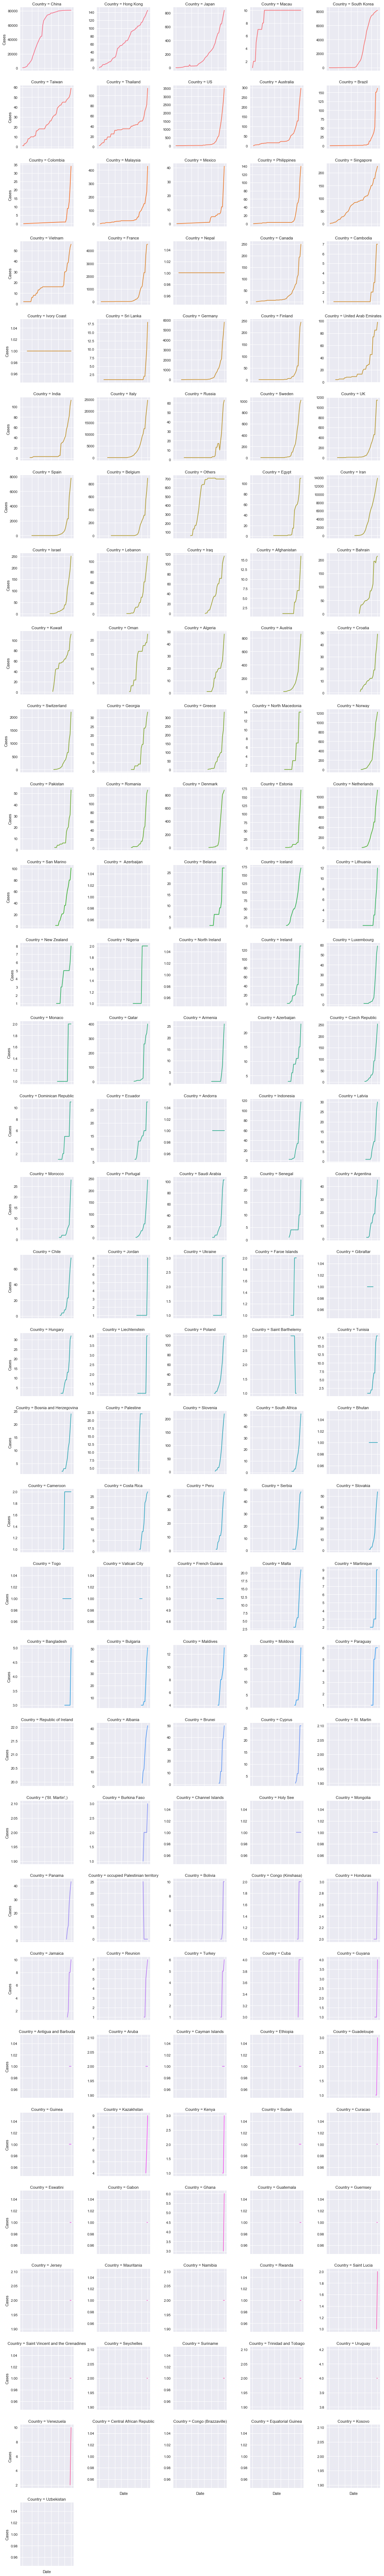

In [75]:
temp = covid_19.groupby(['Date', 'Country'])['Cases'].sum()
temp = temp.reset_index().sort_values(by=['Date', 'Country'])

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country", hue="Country", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Cases")
g.set_xticklabels(rotation=90)
plt.show()

# Recovery and mortality rate over time <a class="anchor" id="mortality_rate"></a>

In [76]:
temp = covid_19.groupby(['Date', 'Country'])['Cases'].sum().reset_index().sort_values('Cases', ascending=False)

px.line(temp, x="Date", y="Cases", color='Country', title='Cases Spread', height=600)

In [77]:
temp = covid_19.groupby('Date').sum().reset_index()

# adding two more columns
temp['No. of Deaths to 100 Confirmed Cases'] = round(temp['Deaths']/temp['Cases'], 3)*100
temp['No. of Recovered to 100 Confirmed Cases'] = round(temp['Recovered']/temp['Cases'], 3)*100

temp = temp.melt(id_vars='Date', value_vars=['No. of Deaths to 100 Confirmed Cases', 'No. of Recovered to 100 Confirmed Cases'], 
                 var_name='Ratio', value_name='Value')

fig = px.line(temp, x="Date", y="Value", color='Ratio', log_y=True, 
              title='Recovery and Mortality Rate Over Time', color_discrete_sequence=[dth, rec])
fig.show()

# Initial Analysis <a class="anchor" id="initial_analysis"></a>

According to the CDC, virus analysis is not performed on the total number of cases per day, but rather the rate of confirmed cases.  This is because most things in nature follow a pattern described best by a sigmoid function.  Meaning that initially the number of cases will be few, but growing exponentially.  At some point the number of cases reaches an inflection point, whereby the number of cases per day begins to decrease.  In other words, the CDC tracks the *rate of change* of the number of cases, and when the rate of change is negative, they know (from experience and nature) that the end is on the horizon.  If we plot our data in simiar way we might be able to find the inflection point.  Similarly, with a known inflection point, we can make an educated guess about the total number of cases at the end of the epidemic.

In [78]:
temp = pd.concat([s_dbd, e_dbd, c_dbd], axis=0, sort=True)
                
fig = px.line(temp, x="Date", y="Cases", color='epidemic', 
             title='No. of new cases',
             color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

fig = px.line(temp, x="Date", y="Deaths", color='epidemic', 
             title='No. of new deaths',
             color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## In the first N days

In [79]:
fig = px.line(temp, x="nth_day", y="Cases", color='epidemic', 
             title='Cases', color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

fig = px.line(temp, x="nth_day", y="Deaths", color='epidemic', 
             title='Deaths', color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

fig = px.line(temp, x="nth_day", y="n_countries", color='epidemic', 
             title='No. of Countries', color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [80]:
fig = px.scatter(epidemics, x='start_year', y = [1 for i in range(len(epidemics))], 
                 size=epidemics['confirmed']**0.3, color='epidemic', title='Confirmed Cases',
                 color_discrete_sequence = shemc, hover_name='epidemic', height=400,
                 text=epidemics['epidemic']+'<br> Cases : '+epidemics['confirmed'].apply(str))
fig.update_traces(textposition='bottom center')
fig.update_yaxes(showticklabels=False)
fig.update_layout(showlegend=False)
fig.show()

fig = px.scatter(epidemics, x='start_year', y = [1 for i in range(len(epidemics))], 
                 size=epidemics['deaths']**0.5, color='epidemic', title='Deaths',
                 color_discrete_sequence = shemc, hover_name='epidemic', height=400,
                 text=epidemics['epidemic']+'<br> Deaths : '+epidemics['deaths'].apply(str))
fig.update_traces(textposition='bottom center')
fig.update_yaxes(showticklabels=False)
fig.update_layout(showlegend=False)
fig.show()

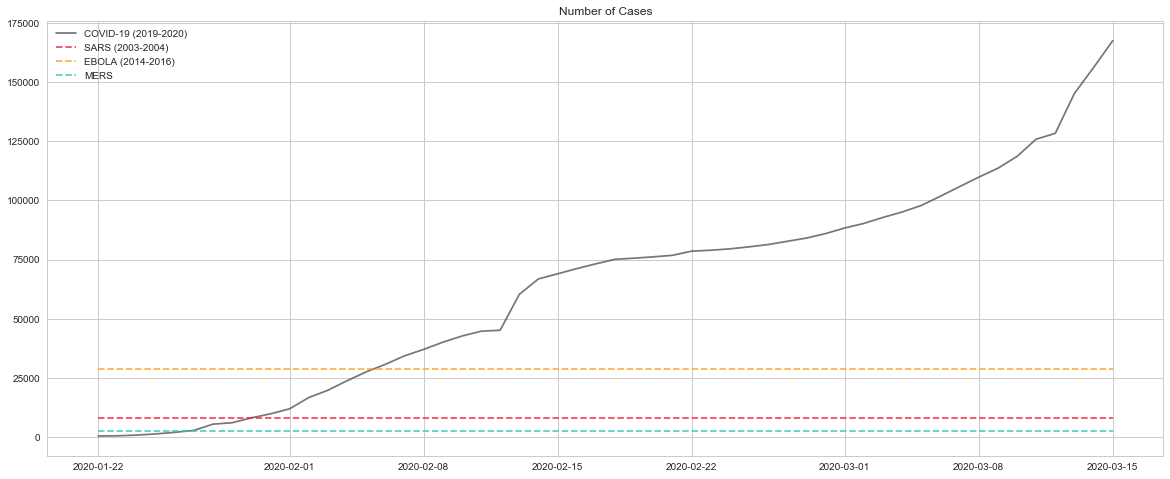

In [81]:
temp = covid_19.groupby('Date')['Cases'].sum().reset_index()

covid = temp['Cases']
sars = [8096 for i in range(len(temp))]
ebola = [28646 for i in range(len(temp))]
mers = [2494 for i in range(len(temp))]
h1n1 = [6724149 for i in range(len(temp))]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 8))
ax = plt.plot(temp['Date'], covid, label='COVID-19 (2019-2020)', c='#555555', alpha=0.8)
ax = plt.plot(temp['Date'], sars, label='SARS (2003-2004)', c='#E71D36', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], ebola, label='EBOLA (2014-2016)', c='#FF9F1C', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], mers, label='MERS', c='#2EC4B6', ls='--', alpha=0.8)
plt.title('Number of Cases')
plt.legend()
plt.show()

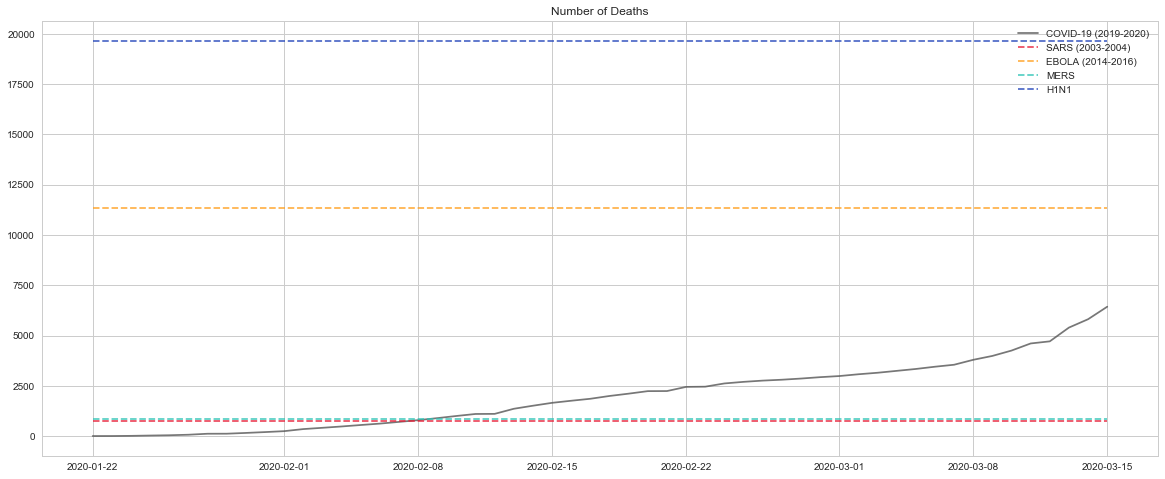

In [82]:
temp = covid_19.groupby('Date')['Deaths'].sum().reset_index()

covid = temp['Deaths']
sars = [774 for i in range(len(temp))]
ebola = [11323 for i in range(len(temp))]
mers = [858 for i in range(len(temp))]
h1n1 = [19654 for i in range(len(temp))]

plt.figure(figsize=(20, 8))
ax = plt.plot(temp['Date'], covid, label='COVID-19 (2019-2020)', c='#555555', alpha=0.8)
ax = plt.plot(temp['Date'], sars, label='SARS (2003-2004)', c='#E71D36', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], ebola, label='EBOLA (2014-2016)', c='#FF9F1C', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], mers, label='MERS', c='#2EC4B6', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], h1n1, label='H1N1', c='#2345BA', ls='--', alpha=0.8)
plt.title('Number of Deaths')
plt.legend()
plt.show()

### Conclusion <a class="anchor" id="conclusion"></a>

At this point, numbers seems to show that **most** of the coronavirus deaths have remained confined to China. This means that measures to contain the virus have been efficient or (and) that the virus does not spread as fast as initially feared. This is not to minimize the current efforts though, and we should also be very grateful to doctors and leaders for measures that have prevented a global pandemic. At this point, they seem to be winning a difficult battle.

On a positive note, scientists have collaborated globally, with Chinese groups sharing the genome of the virus from the start in order to boost research towards a vaccine.

Globally, we are not finished yet.  There are still many more confirmed cases that are not yet in the "recovered" category and much of the rest of the world is still below the inflection point on the Sigmoid curve.